# Stack
 - FILO


## stack에서 발생하는 오류
- 빈 스텍에서 pop : stack underflow
- 꽉 찬 스택에서 push : stack overflow



## stack의 추상적 자료구조 구현
- 배열을 이용한 구현
- 연결 리스트를 이용한 구현

### 연산 정의
- size() : 현재 스택에 들어있는 데이터 원소 수
- isEmpty() : 현재 스택이 비어있는지 판단
- push(x) : 데이터 x 추가
- pop() : stack의 top을 제거 후 값 return
- peek() : stack의 맨 위에 저장된 데이터 원소 반환(제거 x)

### 배열로 스택 구현

In [20]:
from doublylinkedlist import Node
from doublylinkedlist import DoublyLinkedList
# import doublylinkedlist

class ArrayStack:

	def __init__(self):
		self.data = []

	def size(self):
		return len(self.data)

	def isEmpty(self):
		return self.size() == 0

	def push(self, item):
		self.data.append(item)

	def pop(self):
		return self.data.pop()

	def peek(self):
		return self.data[-1]


class LinkedListStack:

	def __init__(self):
		self.data = DoublyLinkedList()

	def size(self):
		return self.data.getLength()

	def isEmpty(self)-> bool:
		return self.size() == 0

	def push(self, item):
		node = Node(item)
		self.data.insertAt(self.size() + 1, node)

	def pop(self):
		return self.data.popAt(self.size())

	def peek(self):
		return self.data.getAt(self.size()).data

## 응용 : 후위 수식의 표기법

- 중위 표기법 (infix notation) : 연산자가 피연산자 사이에 존재 
    - (A+B)*(C+D)
    

- 후위 표기법 (posfix notation) : 연산자가 피연산자 뒤에 위치
    - A B + C D + *

### 알고리즘 설계
- 한글자씩 읽고, 피연산자는 그냥 추력
- ')' 이면 '(' 나올때 까지 스텍에서 pop
- 연산자면 stack에서 이보다 높은 우선순위 것들 pop, 마지막에 만난 연산자 추가하기 



In [48]:
def infixTOposfix(tokenLIst):
    prec = {
        '*' : 3,
        '/' : 3,
        '+' : 2,
        '-' : 2,
        '(' : 1
    }
    opStack = ArrayStack()
    postfixList = []

    for token in tokenLIst:
        if type(token) is int :
            postfixList.append(token)
        elif token == '(':
            opStack.push(token)
        elif token == ')':
            while not opStack.isEmpty() and opStack.peek() != '(':
                postfixList.append(opStack.pop())
            opStack.pop()# 남은 '(' pop
        else:
            if token in ('+','-'): # 스텍 top +- 또는 */이므로 무조건 뺄 수 밖에 없음.
                while not opStack.isEmpty() and opStack.peek() != '(':
                    postfixList.append(opStack.pop())
                opStack.push(token)
            elif token in ('*','/'): # top이 +- 이면 넣으면 되나,  */면 한번 빼줘야함.
                while not opStack.isEmpty() and opStack.peek() in ('*','/') :
                    postfixList.apppend(opStack.pop())
                opStack.push(token)
       
    while not opStack.isEmpty():
        postfixList.append(opStack.pop())
    
    return postfixList


                    



## 응용 : 후위 표기식 계산하기


In [49]:
def splitTokens(expr):
    tokens = []
    val = 0
    valProcessing = False
    for c in expr:
        if c == ' ': continue
        if c in '0123456789':
            val = val*10 + int(c)
            valProcessing = True
        else : 
            if valProcessing:
                tokens.append(val)
                val = 0
            valProcessing = False
            tokens.append(c)
    if valProcessing:
        tokens.append(val)
    return tokens

def postfixEval(tokenList):
    valStack = ArrayStack()

    for token in tokenList:
        if type(token) is int :
            valStack.push(token)
        else:
            x1 = valStack.pop()
            x2 = valStack.pop()
            if token == '*':
                valStack.push(x2*x1)
            elif token == '/':
                valStack.push(x2/x1)
            elif token == '+':
                valStack.push(x2+x1)
            elif token == '-':
                valStack.push(x2-x1)

    return valStack.pop()

# 중위 표기식
def solution(expr):
    tokens = splitTokens(expr)
    postfix = infixTOposfix(tokens)
    val = postfixEval(postfix)
    return val

expression = '(2-5)*24'
solution(expression)

-72

# Queue
- FIFO

## 연산
- enqueue : 원소 push
- dequeue : 원소 pop

## 구현
- 배열
- 양방향 연결리스트


### 연산 정의 
    - 배열 - 연결리스트 사이 연산 복잡도에 대해 생각해보기
- size() : 현재 큐에 들어 있는 데이터 원소의 수를 구함.
- isEmpty() : 현재 비어있는지 여부
- enqueue(x) : data x를 추가
- dequeue() : 큐의 맨 앞에 저장된 데이터 원소를 제거, return
- peek() : 큐의 맨 앞에 저장된 데이터 return


In [ ]:
class ArrayQueue:

	def __init__(self):
		self.data = []
	
	# O(1)
	def size(self):
		return len(self.data)

	# O(1)
	def isEmpty(self):
		return self.size() == 0

	# O(1)
	def enqueue(self, item):
		self.data.append(item)

	# O(n) : 원소 n개를 옮겨야 함.
	def dequeue(self):
		return self.data.pop(0)

	# O(1)
	def peek(self):
		return self.data[0]
	
class LinkedListQueue:

	def __init__(self):
		self.data = DoublyLinkedList()

	def size(self):
		return self.data.getLength()

	def isEmpty(self)-> bool:
		return self.size() == 0

	def enqueue(self, item):
		node = Node(item)
		self.data.insertAt(self.size() + 1, node)

	def dequeue(self):
		return self.data.popAt(1)

	def peek(self):
		return self.data.getAt(self.size()).data
	
q = LinkedListQueue()
for i in range(1,20):
	q.enqueue(i)
for i in range(1,20):
	print(q.dequeue(), end = ' ')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

# Circular Queue


### queue의 활용방안
- 자료를 생성하는 작업이 여러곳에서 일어남
- 자료 이용하는 작업이 여러곳에서 일어남
- 자료를 생성과 이용이 양쪽 다 여러 곳에서 일어나는 경우

### 환영 queue의 활용
- 기존 queue에서 원소 삭제시 뒤 원소들을 한칸씩 앞으로 당겨야 함.
- 원소 개수 증가할 수록 시간이 오래걸리므로, circlar queue를 활용하여 극복
- 처음과 끝을 가리키는 front, rear 포인터를 활용해 앞뒤를 기억함.
- 정해진 개수의 저장 공간을 빙 돌려가며 사용함.


### 연산 정의
- size() : 현재 큐에 들어 있는 데이터 원소의 수를 구함.
- isEmpty() : 현재 비어있는지 여부
- enqueue(x) : data x를 추가
- dequeue() : 큐의 맨 앞에 저장된 데이터 원소를 제거, return
- peek() : 큐의 맨 앞에 저장된 데이터 return
- isFull() : 큐에 데이터가 다 찬 상태인지 판단함.


## 구현
- 배열 
    - enqueue 시, 마지막 원소를 rear가 가리킴
    - dequeue 시, 첫번째 원소를 front가 가리키며 원소를 pop함.
    
- 

In [ ]:
class CircularQueue:
    def __init__(self,n) -> None:
        self.maxCount = n
        self.data = [None]*n
        self.count = 0
        self.front, self.rear = -1,-1

    def enqueue(self, x):
        if self.isFull():
            raise IndexError('Queue full')
        self.rear = (self.rear+1)%self.maxCount
        self.data[self.rear] = x
        self.count += 1

    def dequeue(self):
        if self.count == 0 :
            raise IndexError('Queue Empty')
        self.front = (self.front+1)%self.maxCount
        x = self.data[self.front]
        self.count -= 1
        return x

    def peek(self):
        if self.isEmpty():
            raise IndexError('Queue Empty')
        return self.data[self.rear]

# 우선순위 큐 : Priority Queue
- FIFO방식을 따르지 않고 원소들의 우선순위에 따라 큐에서 빠져나옴.

## 구현
1. enqueue시 우선순위 순서 유지하도록
2. dequeue시 우선순위 높은 것을 선택하도록
- 2번의 경우 pop시 모든 원소를 탐색하므로 1번이 좀더 유리함

- 선형배열 이용 : 한칸씩 옮겨야하므로 (-)
- 연결 리스트 이용 : 메모리 차지량 많음 (-)

In [ ]:
class PriorityQueue:
    def __init__(self) -> None:
        self.queue = DoublyLinkedList()

    def size(self):
        return self.queue.getLength()

    def isEmpty(self)-> bool:
        return self.size() == 0

    def dequeue(self):
        return self.queue.popAt(1)

    def peek(self):
        return self.queue.getAt(self.size()).data
    
    # getAt()을 이용하지 않음.
    def enqueue(self, x):
        newNode = Node(x)
        curr = self.queue.head.next
        
        while curr.data != None and curr.data < newNode.data :
            curr = curr.next

        self.queue.insertBefore(curr,newNode)

q1 = PriorityQueue()

for i in range(1,20):
    val = i*2 + i%13 + i%11
    print (i,val )
    q1.enqueue(val)
print('<min priority Queue>')
q1.queue

1 4
2 8
3 12
4 16
5 20
6 24
7 28
8 32
9 36
10 40
11 33
12 37
13 28
14 32
15 36
16 40
17 44
18 48
19 52
<min priority Queue>


4 -> 8 -> 12 -> 16 -> 20 -> 24 -> 28 -> 28 -> 32 -> 32 -> 33 -> 36 -> 36 -> 37 -> 40 -> 40 -> 44 -> 48 -> 52

# 트리 : Trees
- 2차원 자료구조
- node와 edge를 이용하여 데이터의 배치 형태를 추상화한 자료구조, graph의 일환

## Node
- leaf node
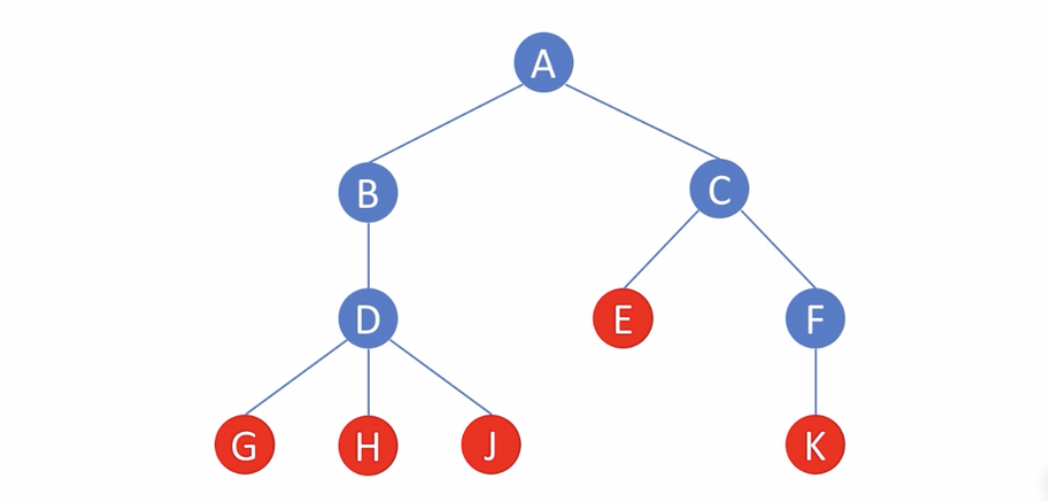

- internal node
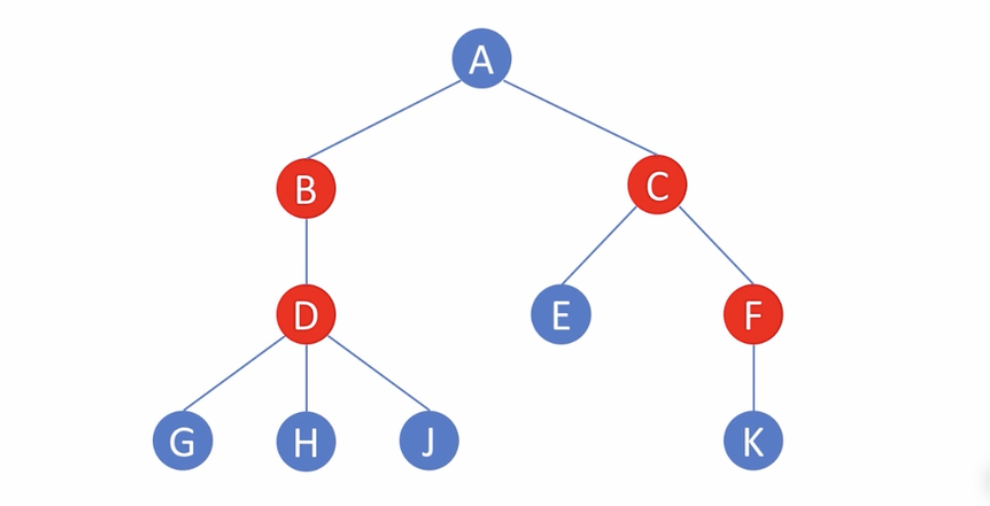

- D는 G,H,J의 부모, G,H,J는 G의 자식노드

- ancestor 조상 노드 - 부모의 모든 부모노드
- descendant 후손 노드 - 자식의 모든 자식노드

## Level : 수준
- 시작은 0이나 1로 시작할 수 있음
- ex.

 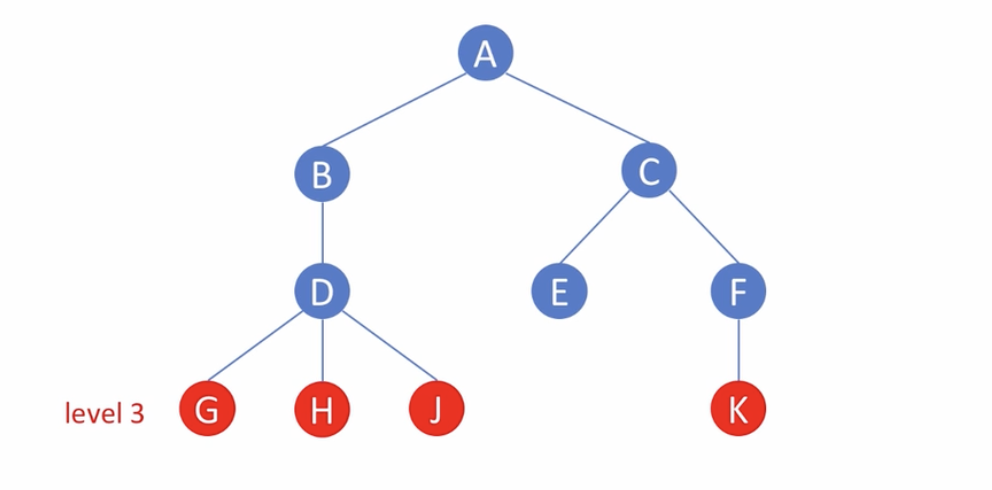

## Height : 높이 ( = Depth: 깊이)
- 높이 = level + 1
- 이미지 내 빨간 노드 깊이 : 4

## 서브트리 : subtree
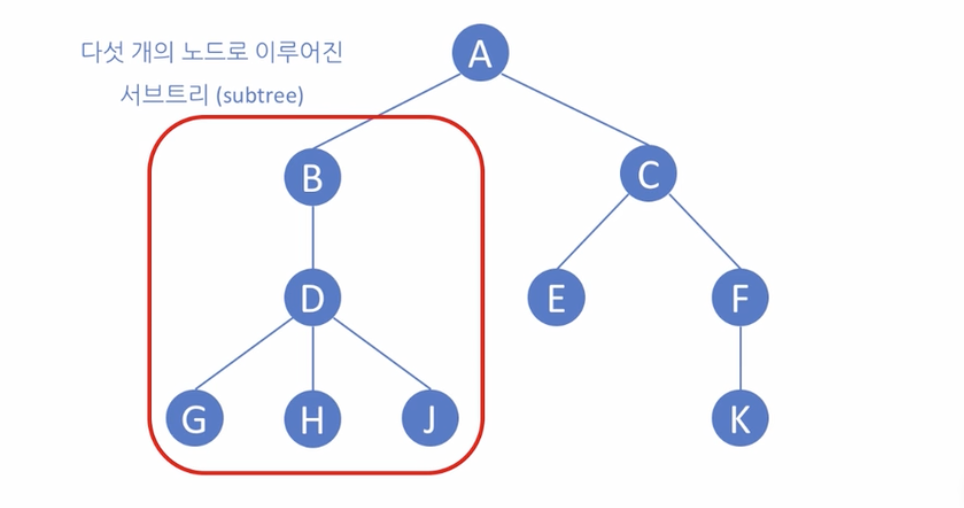

## Degree : 노드의 차수 
- 자식(서브트리)의 수
- 노드 A의 degree는 2
- leaf node의 자식노드는 degree가 0

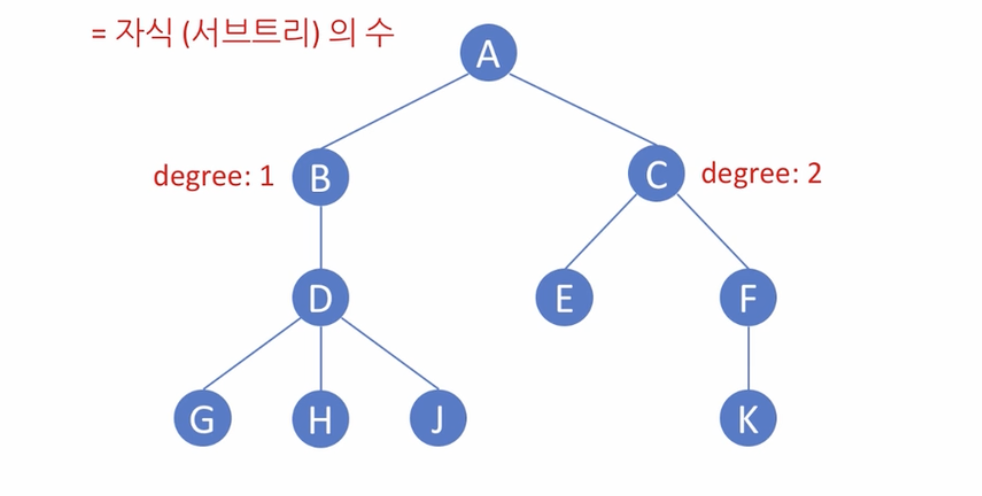

## Binary Tree : 이진트리
- 모든 노드의 차수가 **2 이하**
- 재귀적으로 정의 가능
- **빈 트리**이거나, 루트노드 + left subtree + right subtree가 모두 **이진트리**이면 이진트리이다.

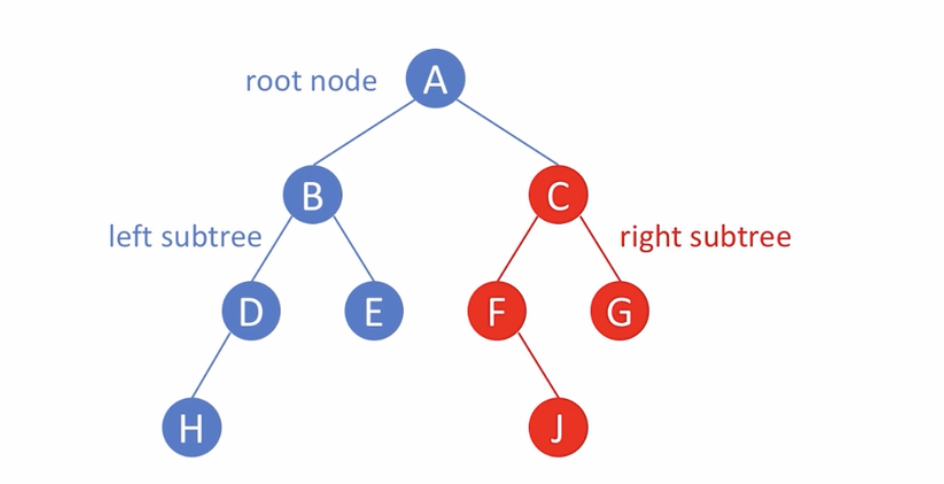

## Full Binary Tree : 포화 이진 트리
- 모든 레벨에서 노드들이 모두 채워져 있음.(각 노드 차수 모두 2)
- **높이가 k**이고 노드의 개수가 **2ᴷ-1**인 이진트리이면 포화 이진 트리

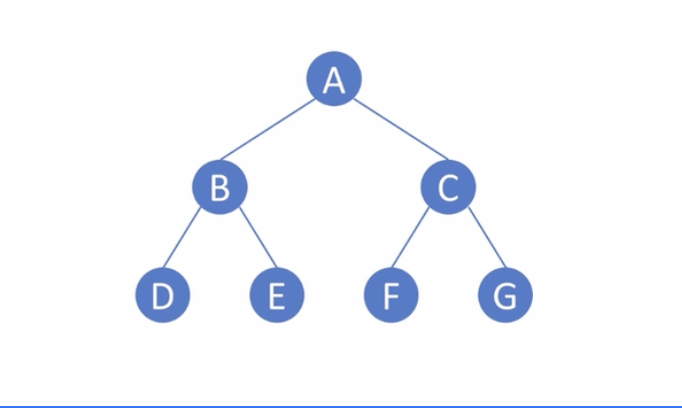

## Complete Binary Tree : 완전 이진 트리
- 높이 k인 완전 이진 트리
- 레벨 k-2까지는 포화 이진 트리
- 레벨 k-1부터 왼쪽부터 순차적으로 노드가 채워짐

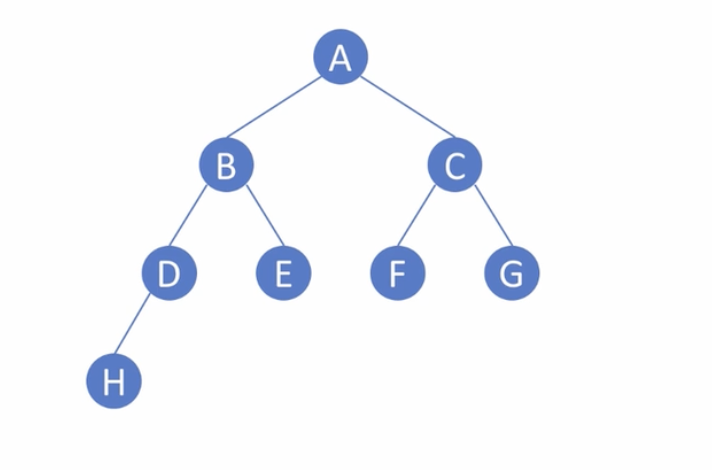

## 이진 트리의 추상적 자료구조 : 연산 정의
- size() : 현재 트리에 포함되어 있는 노드의 수를 구함
- depth() : 현재 트리의 깊이 return
- **순회**

## Traversal : 트리 순회
- **깊이 우선 순회*** : depth first traversal
    - 중위 순회 (inorder) **L-Root-R**
    - 전위 순회 (preorder) **Root-L-R**
    - 후위 순회 (postorder) **L-R-Root**
# 
- **넓이 우선 순회** : breath first traversal

    - level이 낮은 노드를 우선으로 방문
    - 같은 수준 노드들 사이에선, 부모노드의 방문순서에 따라 방문하며, 왼쪽 자식 먼저 방문한다.
    - 재귀적 방식이 적합? X
    - queue를 이용
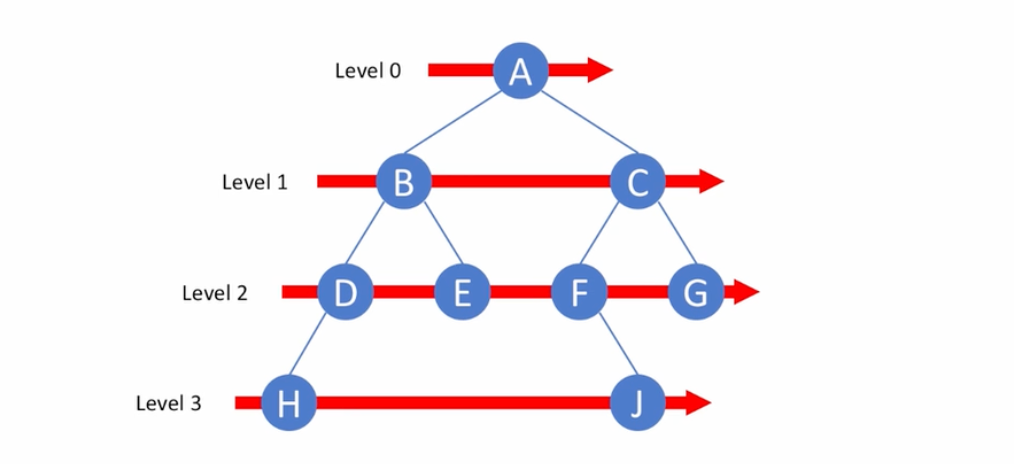


In [ ]:
class Node : 
    def __init__(self,item) -> None:
        self.data = item
        self.left = None
        self.right = None
    
    def size(self):
        l = self.left.size() if self.left else 0
        r = self.right.size() if self.right else 0
        
        return l + r + 1 # 1은 root 
    
    def depth(self):
        l = self.left.size()
        r = self.right.size()
        
        return l+1 if l > r else r+1

    def inorder(self):
        traversal = []
        if self.left : 
            traversal += self.left.inorder()
        traversal.append(self.data)
        if self.right:
            traversal += self.right.inorder()
        return traversal

    def preorder(self):
        traversal = []
        traversal.append(self.data)
        if self.left : 
            traversal += self.left.preorder()
        if self.right:
            traversal += self.right.preorder()
        return traversal
    
    def postorder(self):
        traversal = []
        if self.left : 
            traversal += self.left.postorder()
        if self.right:
            traversal += self.right.postorder()
        traversal.append(self.data)
        return traversal
    
class binaryTree : 
    def __init(self,r):
        self.root = r

    # 재귀 버전
    def size(self):
        if self.root :
            return self.root.size()
        else : return 0
    
    def depth(self):
        if self.root:
            return self.root.depth()
        else: return 0

    def inorder(self):
        if self.root:
            return self.root.inorder()
        else: return []

    def preorder(self):
        if self.root:
            return self.root.preorder()
        else: return []

    def postorder(self):
        if self.root:
            return self.root.postorder()
        else: return []
 

# Binary Search Tree : 이진 탐색 트리
- 모든 노드에 대해, 
    - 왼쪽 서브트리의 데이터는 루트노드 값보다 작음
    - 오른쪽 서브트리 데이터는 루트노드 값보다 큼
    

## 이진탐색트리의 추상적 자료구조 : 연산 정의
- insert(key,data) - 트리에 주어진 데이터 원소 추가
- **remove(key)** - 특정 원소를 트리로부터 삭제
- lookup(key) - 특정원소 검색
- inorder() - 키의 순서로 원소나열
- min(), max() - 최대, 최소 키를 가지는 노드 찾기


### 원소 삭제
1. 키를 이용해 노드를 찾는다.
2. 찾은 노드 제거하고 이진트리성질 만족하도록 재배열해줄 것.

### 설계
삭제되는 노드가
1. 리프노드일 경우

    - 그냥 삭제함.
    #
2. 자식을 하나 갖고 있는 경우

    - 삭제되는 노드 자리에 그 자식을 대신 배치함
    - 자식이 왼쪽인지 오른쪽인지 알아야함.
    #
3. 자식을 두개 갖고 있는 경우
    - 삭제되는 노드보다 바로 다음으로 큰 키를 가지는 노드를 찾아 그 노드를 삭제되는 노드 자리에 대신 배치, 이후 삭제하기 (successor : S를 찾아야 함.)


In [ ]:
class Node :
    def __init__(self, key,data):
        self.key = key
        self.data = data
        self.left = None
        self.right = None

    def inorder(self):
        traversal = []
        if self.left : 
            traversal += self.left.inorder()
        traversal.append(self) # 객체를 추가. node append
        if self.right:
            traversal += self.right.inorder()
        return traversal
    
    def lookup(self, key, parent=None)-> (Node, Node): # 찾은 노드, 부모노드
        if key < self.key : #찾는게 보다 작음
            if self.left :
                return self.left.lookup(key,self)
            else : return None, None
        elif key > self.key: # 보다 큼
            if self.right :
                return self.right.lookup(key,self)
            else : return None, None
        else : return self, parent # 찾음

    def min(self):
        if self.left :
            return self.left.min()
        else : return self

    def max(self):
        if self.right:
            return self.right.max()
        else: return self

    def insert(self, key, data):
        if key < self.key :
            if self.left:
                self.left.insert(key,data)
            else :
                self.left = Node(key,data)
        elif key > self.key :
            if self.right :
                self.right.insert(key,data)
            else :
                self.right = Node(key,data)
        
        else :
            raise KeyError('...')
        
    def countChildren(self):
        count = 0
        if self.left : 
            count +=1 
        if self.right :
            count += 1
        return count
class BinSearchTree : 
    def __init__(self) -> None:
        self.root = None

    def inorder(self):
        if self.root:
            return self.root.inorder()
        else: return []
    
    def min(self):
        if self.root :
            return self.root.min()
        else : return self

    def max(self):
        if self.root :
            return self.root.max()
        else : return self

    def insert(self, key, data):
        if self.root :
            self.root.insert(key,data)
        else:
            self.root = Node(key,data)

    def remove(self,key):
        node,parent = self.lookup(key)
        if node :
            pass 
            return True
        else :
            pass
            return False

# Heap : 힙

- 이진트리의 한 종류
1. 루트노드가 언제나 자식노드보다 최댓값 또는 최솟값을 가짐 
    - 최대힙, 최소힙
2. 완전 이진 트리이어야 함.

- 이진탐색트리와 비교
1. 원소들은 완전히 크기 순으로 정렬되어 있는가?
    - BST O, Heap X
    #
2. 특정 키 값을 가지는 원소를 빠르게 검색할 수 있는가?
    - BST O, Heap X
    #
3. 부가의 제약조건?
    - Heap은 완전 이진트리이어야 한다는 제약

## 추상적 자료구조 : 연산 정의
- \_\_init\_\_(): 빈 최대 힙 생성
- insert(item) : 새로운 원소 삽입
- remove() - 최대 원소(root node)를 반환 및 삭제

- 배열을 이용한 이진트리 (완전 이진 트리이기 때문)

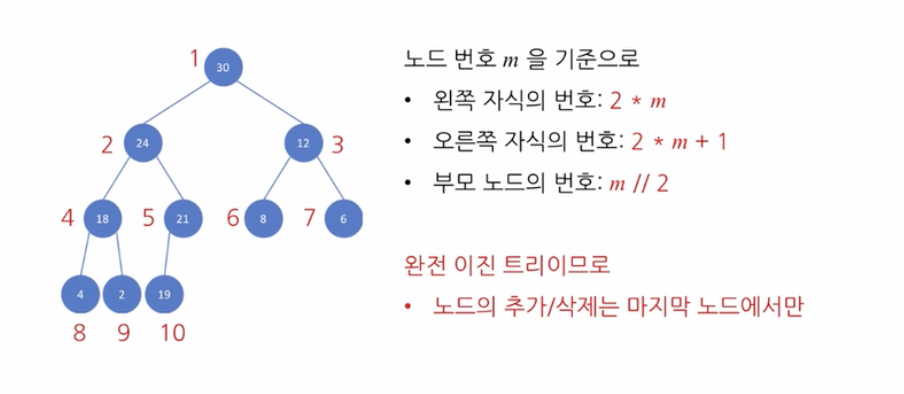

### 원소 삭제 : 최대 힙
1. 루트 노드 제거 - 이것이 원소들 중 최댓값
2. 트리 마지막 자리 노드를 임시로 루트 노드의 자리에 배치
3. 자식노드들과 값 비교하며 아래로 계속 이동.

### 시간 복잡도
- 자식 노드들과 대소 비교 최대 횟수 : 2*logN
- O(logN)

In [ ]:
class MaxHeap:
    def __init__(self):
        self.data = [None] # 0번 idx버림

    # 원소 삽입 O(logN) : 두 값을 바꿈
    def insert(self,item):
        if self.data:
            pass
        else : self.data.append(item)
    
    def remove(self):
        if len(self.data) > 1 : # 하나이상 노드 존재
            self.data[1], self.data[-1] = self.data[-1], self.data[1]
            data = self.data.pop(-1)
            self.maxHeapify(1)# root부터 시작하여 max heap구조 유지
        else : data = None

        return data

    def mexHeapify(self, i):
        left = 2*i
        right = 2*i+1
        smallest = i
        # 자신, 왼쪽자식 , 오른쪽 자식 중 최대를 찾음

        if smallest != i :
            #현재 노드와 최댓값 노드 바꾸기
            pass
    
    def heapsort(unsorted):
        H = MaxHeap()
        for item in unsorted:
            H.insert(item)
        sorted = []
        d = H.remove()

        while d : 
            sorted.append(d)
            d = H.remove()

        return sorted

### heap의 응용
1. 우선순위 큐
    
    - enqueue시, 느슨한 정렬을 이루도록 함 O(logN)
    - dequeue시, 최댓값을 순서대로 추출 : O(logN)
    - 양방향 연결리스트와 비교
#
2. 힙정렬
    - 졍렬되지 않은 원소들을 아무 순서로다 최대 힙에 삽입 O(logN)
    - 삽입 후, 힙이 비게 될 때까지 하나씩 삭제 : O(logN)
    - 원소들이 삭제된 순서가 원소들의 정렬 순서
    - 정렬 알고리즘 복잡도 : O(NlogN)